# 기계학습 과제#1

# Absenteeism at work dataset - EDA & Machine Learning Model

In [1]:
# 설치되지 않은 라이브러리/모듈..은 anaconda prompt에서 pip install ~

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style

%matplotlib inline
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.tools as tls
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)
import squarify

# import 클러스터링 위한 라이브러리
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

## 1. 데이터 선택

In [2]:
# 데이터 불러오기
data = pd.read_csv('Absenteeism_at_work.csv', delimiter = ';')
data.head()

ID  Reason for absence  Month of absence  Day of the week  Seasons  \
0  11                  26                 7                3        1   
1  36                   0                 7                3        1   
2   3                  23                 7                4        1   
3   7                   7                 7                5        1   
4  11                  23                 7                5        1   

   Transportation expense  Distance from Residence to Work  Service time  Age  \
0                     289                               36            13   33   
1                     118                               13            18   50   
2                     179                               51            18   38   
3                     279                                5            14   39   
4                     289                               36            13   33   

   Work load Average/day   ...  Disciplinary failure  Education  Son  \
0                 239.554  ...                     0          1    2   
1                 239.554  ...                     1          1    1   
2                 239.554  ...                     0          1    0   
3                 239.554  ...                     0          1    2   
4                 239.554  ...                     0          1    2   

   Social drinker  Social smoker  Pet  Weight  Height  Body mass index  \
0               1              0    1      90     172               30   
1               1              0    0      98     178               31   
2               1              0    0      89     170               31   
3               1              1    0      68     168               24   
4               1              0    1      90     172               30   

   Absenteeism time in hours  
0                          4  
1                          0  
2                          2  
3                          4  
4                          2  

[5 rows x 21 columns]

In [3]:
data.describe()

ID  Reason for absence  Month of absence  Day of the week  \
count  740.000000          740.000000        740.000000       740.000000   
mean    18.017568           19.216216          6.324324         3.914865   
std     11.021247            8.433406          3.436287         1.421675   
min      1.000000            0.000000          0.000000         2.000000   
25%      9.000000           13.000000          3.000000         3.000000   
50%     18.000000           23.000000          6.000000         4.000000   
75%     28.000000           26.000000          9.000000         5.000000   
max     36.000000           28.000000         12.000000         6.000000   

          Seasons  Transportation expense  Distance from Residence to Work  \
count  740.000000              740.000000                       740.000000   
mean     2.544595              221.329730                        29.631081   
std      1.111831               66.952223                        14.836788   
min      1.000000              118.000000                         5.000000   
25%      2.000000              179.000000                        16.000000   
50%      3.000000              225.000000                        26.000000   
75%      4.000000              260.000000                        50.000000   
max      4.000000              388.000000                        52.000000   

       Service time         Age  Work load Average/day   ...  \
count    740.000000  740.000000              740.000000  ...   
mean      12.554054   36.450000              271.490235  ...   
std        4.384873    6.478772               39.058116  ...   
min        1.000000   27.000000              205.917000  ...   
25%        9.000000   31.000000              244.387000  ...   
50%       13.000000   37.000000              264.249000  ...   
75%       16.000000   40.000000              294.217000  ...   
max       29.000000   58.000000              378.884000  ...   

       Disciplinary failure   Education         Son  Social drinker  \
count            740.000000  740.000000  740.000000      740.000000   
mean               0.054054    1.291892    1.018919        0.567568   
std                0.226277    0.673238    1.098489        0.495749   
min                0.000000    1.000000    0.000000        0.000000   
25%                0.000000    1.000000    0.000000        0.000000   
50%                0.000000    1.000000    1.000000        1.000000   
75%                0.000000    1.000000    2.000000        1.000000   
max                1.000000    4.000000    4.000000        1.000000   

       Social smoker         Pet      Weight      Height  Body mass index  \
count     740.000000  740.000000  740.000000  740.000000       740.000000   
mean        0.072973    0.745946   79.035135  172.114865        26.677027   
std         0.260268    1.318258   12.883211    6.034995         4.285452   
min         0.000000    0.000000   56.000000  163.000000        19.000000   
25%         0.000000    0.000000   69.000000  169.000000        24.000000   
50%         0.000000    0.000000   83.000000  170.000000        25.000000   
75%         0.000000    1.000000   89.000000  172.000000        31.000000   
max         1.000000    8.000000  108.000000  196.000000        38.000000   

       Absenteeism time in hours  
count                 740.000000  
mean                    6.924324  
std                    13.330998  
min                     0.000000  
25%                     2.000000  
50%                     3.000000  
75%                     8.000000  
max                   120.000000  

[8 rows x 21 columns]

In [4]:
# 결측치 확인
data.isnull().sum().sort_values(ascending = False)

ID                                 0
Disciplinary failure               0
Body mass index                    0
Height                             0
Weight                             0
Pet                                0
Social smoker                      0
Social drinker                     0
Son                                0
Education                          0
Hit target                         0
Reason for absence                 0
Work load Average/day              0
Age                                0
Service time                       0
Distance from Residence to Work    0
Transportation expense             0
Seasons                            0
Day of the week                    0
Month of absence                   0
Absenteeism time in hours          0
dtype: int64

In [5]:
data.dtypes

ID                                   int64
Reason for absence                   int64
Month of absence                     int64
Day of the week                      int64
Seasons                              int64
Transportation expense               int64
Distance from Residence to Work      int64
Service time                         int64
Age                                  int64
Work load Average/day              float64
Hit target                           int64
Disciplinary failure                 int64
Education                            int64
Son                                  int64
Social drinker                       int64
Social smoker                        int64
Pet                                  int64
Weight                               int64
Height                               int64
Body mass index                      int64
Absenteeism time in hours            int64
dtype: object

# Data Vizualization

C:\Users\jwoo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Education', ylabel='count'>

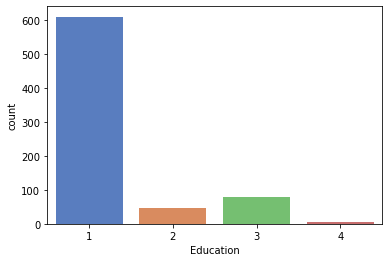

In [6]:
# education countplot
sns.countplot(data['Education'], palette = 'muted')

C:\Users\jwoo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Seasons', ylabel='count'>

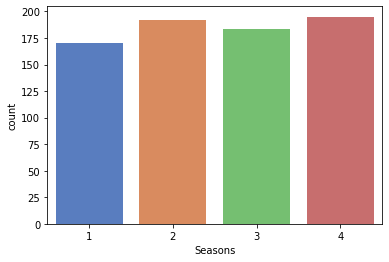

In [7]:
# seasons countplot
sns.countplot(data['Seasons'], palette = 'muted')

Text(0.5, 1.0, 'Month of absence vs Seasons')

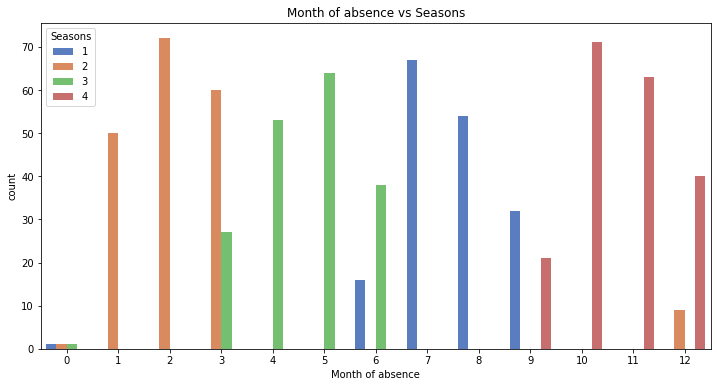

In [8]:
# x축 : Month of absence
# y축 : Seasons
plt.figure(figsize = (12,6))
sns.countplot(x = 'Month of absence', hue = 'Seasons', data = data,palette = 'muted')
plt.title("Month of absence vs Seasons")

<Figure size 720x480 with 0 Axes>

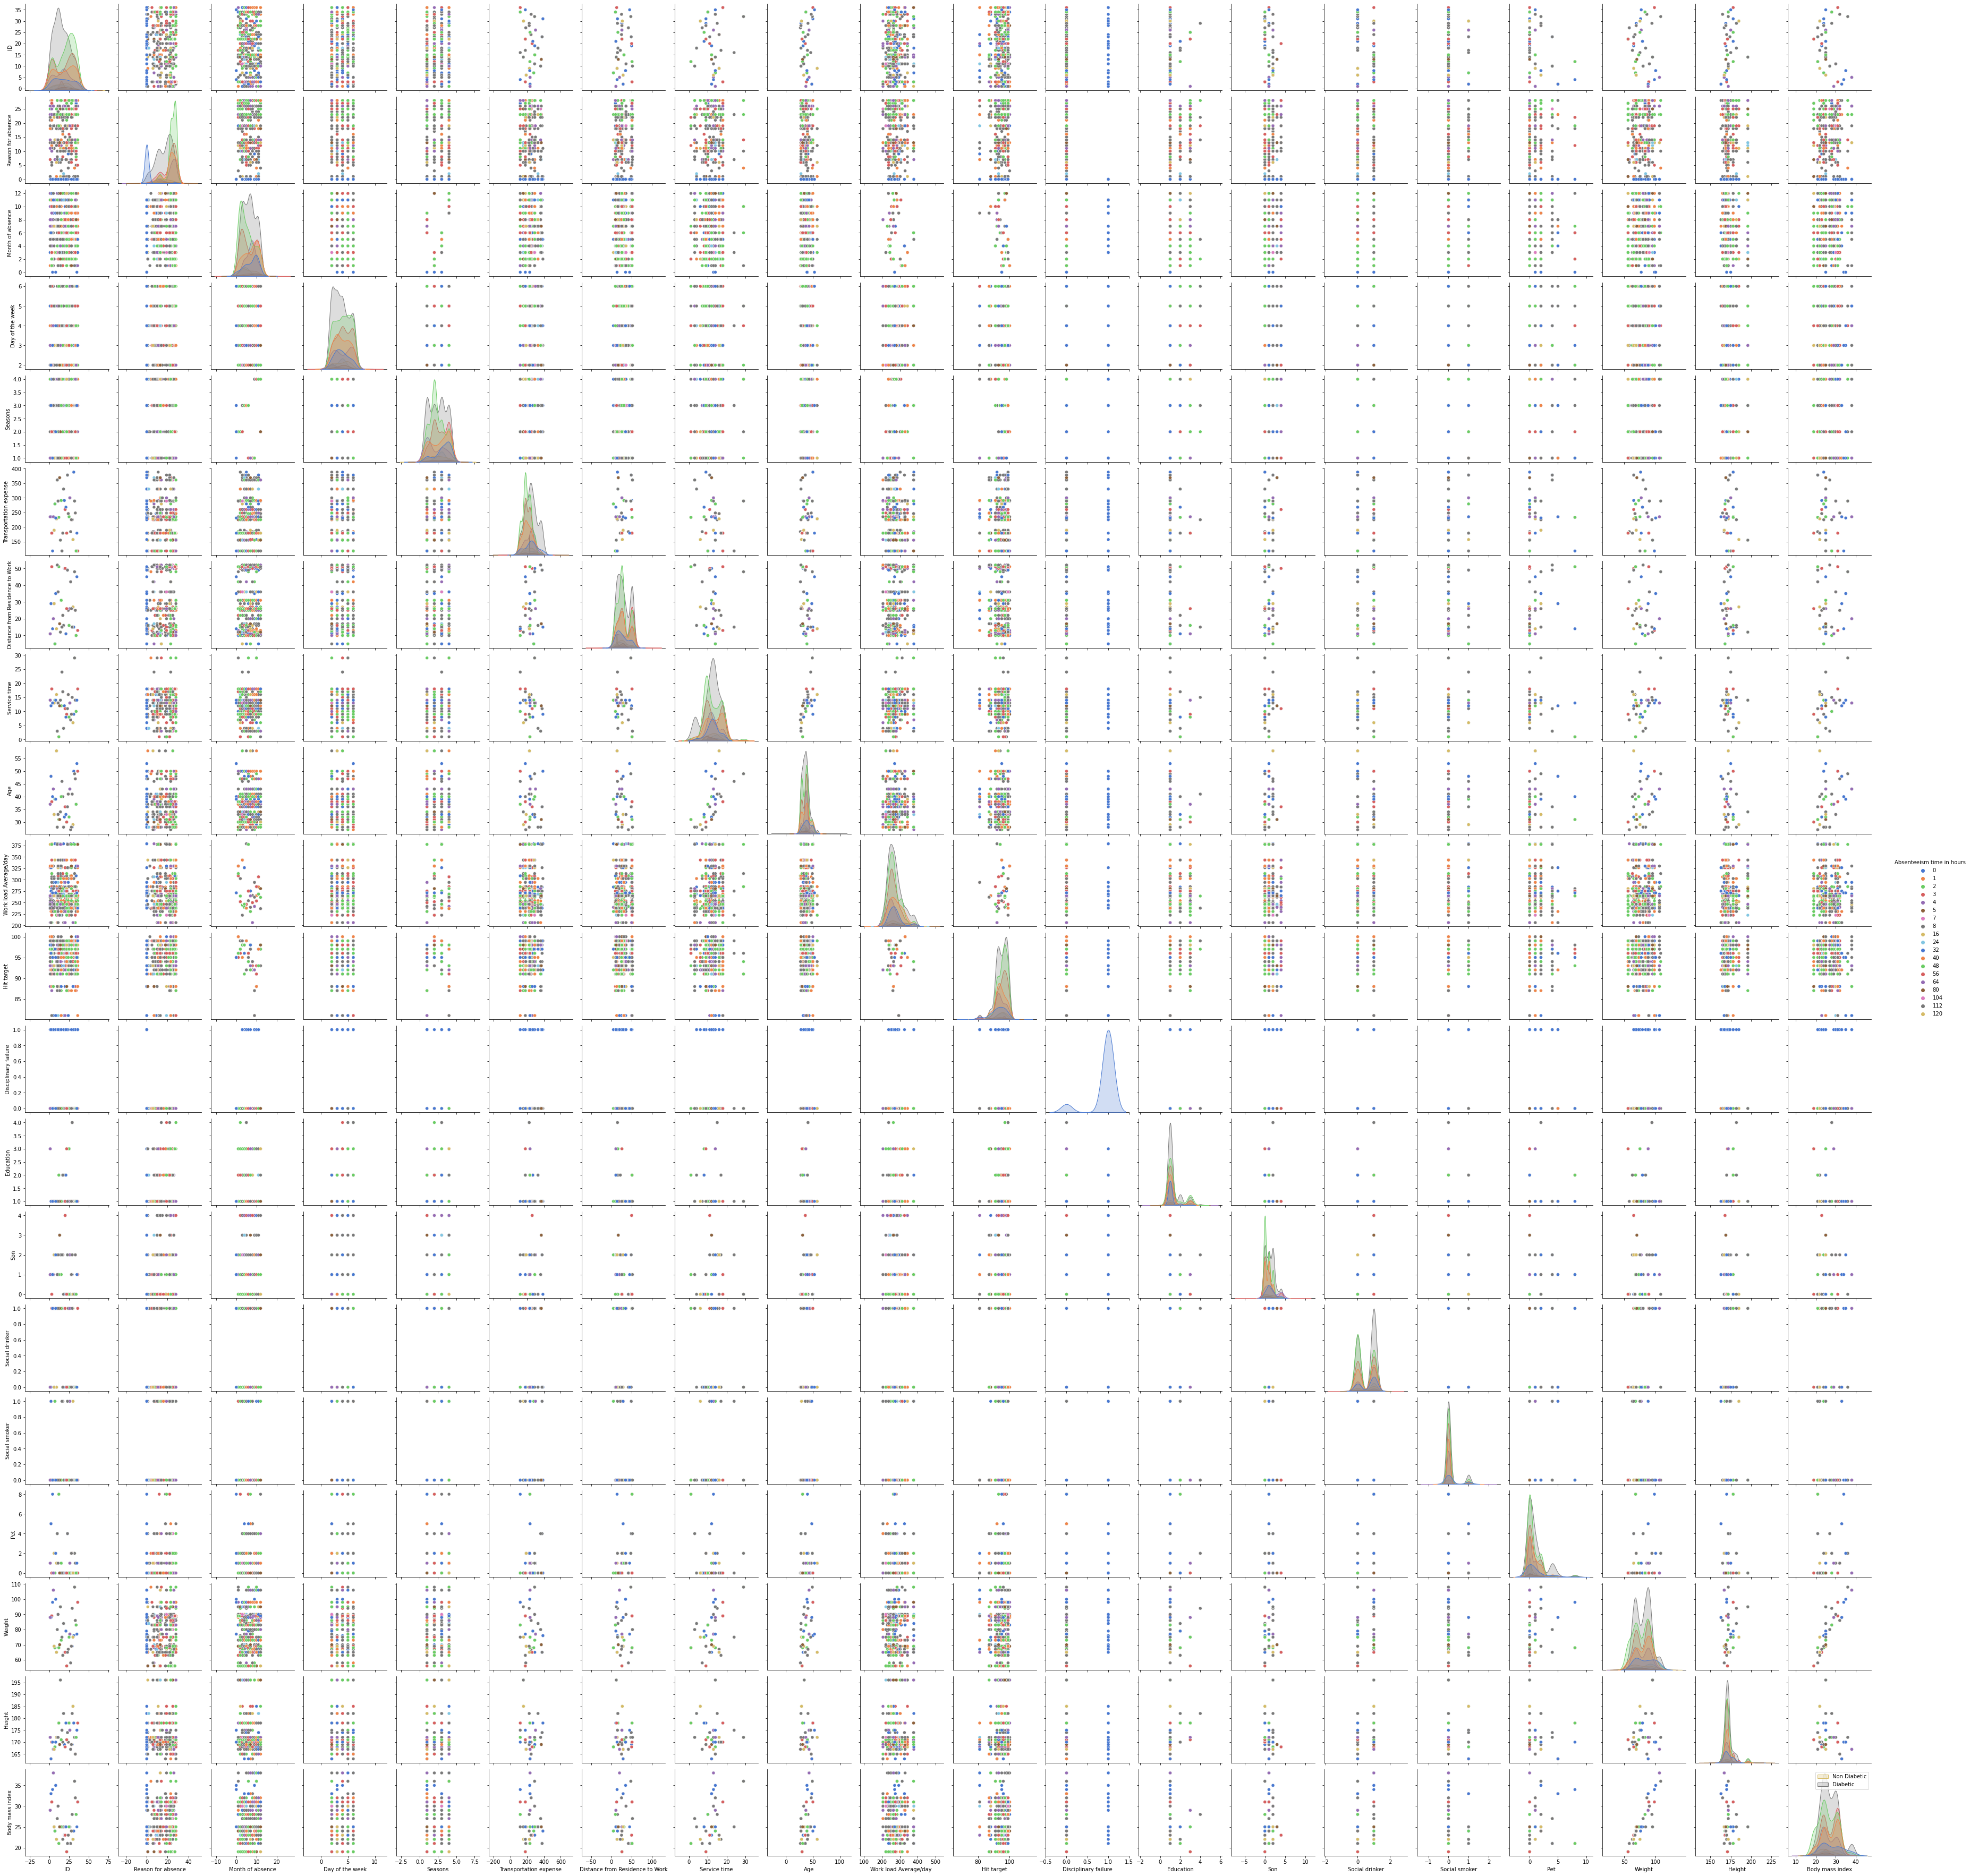

In [9]:
plt.figure(dpi = 120)
sns.pairplot(data, hue = 'Absenteeism time in hours', palette = 'muted')
plt.legend(['Non Diabetic','Diabetic'])
plt.show()

Joint plot of Month of Absence with Other Variables
Correlation between Month of absence and ID ==>  -4.345564344224726e-05


<Figure size 500x400 with 0 Axes>

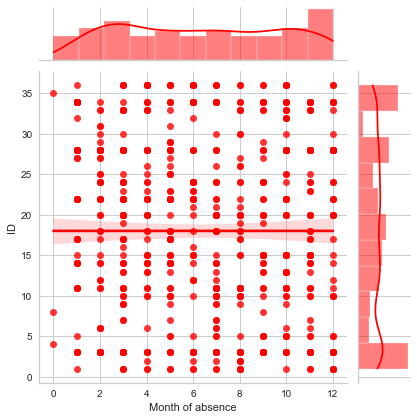

Correlation between Month of absence and Reason for absence ==>  -0.0838577736814677


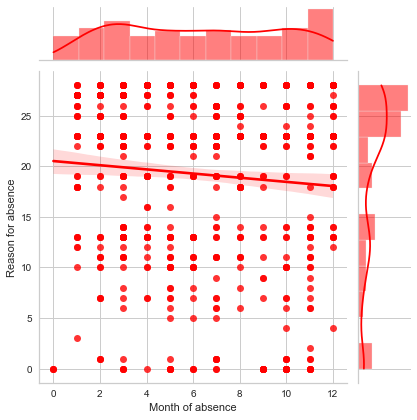

Correlation between Month of absence and Month of absence ==>  1.0


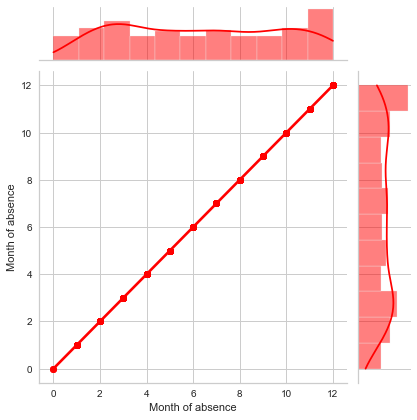

Correlation between Month of absence and Day of the week ==>  -0.006528007792432536


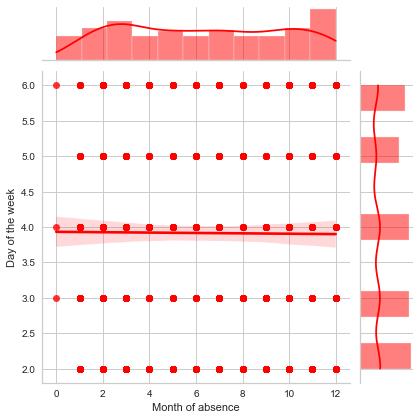

Correlation between Month of absence and Seasons ==>  0.40776958003074787


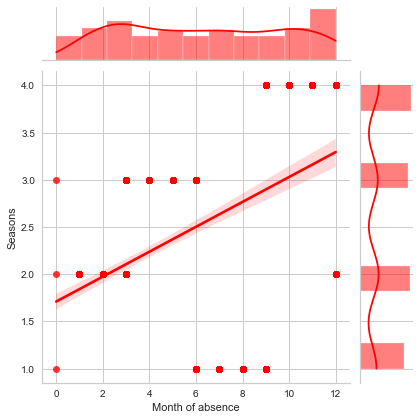

Correlation between Month of absence and Transportation expense ==>  0.13752456639267643


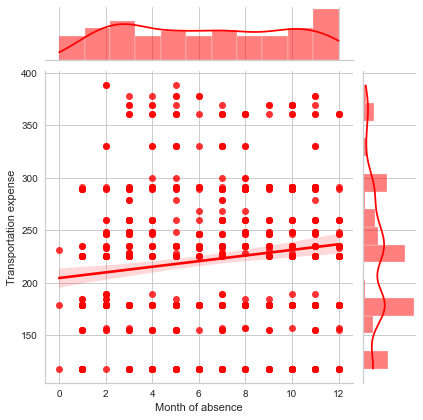

Correlation between Month of absence and Distance from Residence to Work ==>  -0.003887260667884661


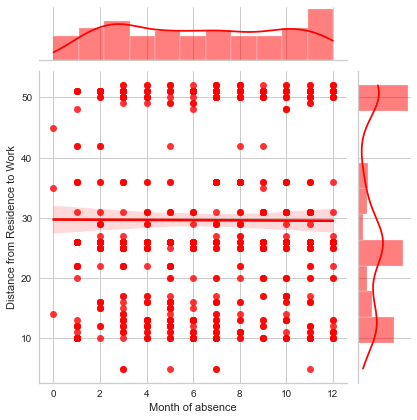

Correlation between Month of absence and Service time ==>  -0.0628623124578399


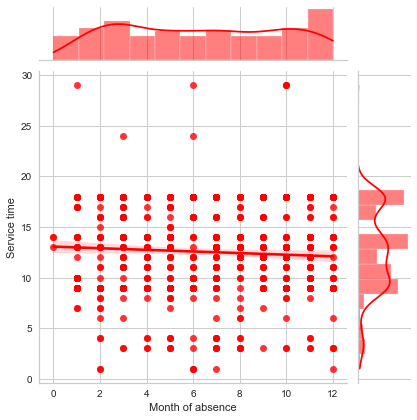

Correlation between Month of absence and Age ==>  -0.0015195444984269823


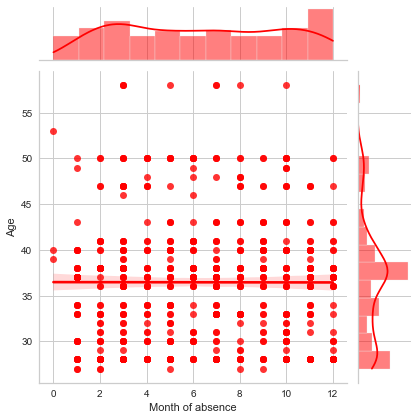

Correlation between Month of absence and Work load Average/day  ==>  -0.16998946682179478


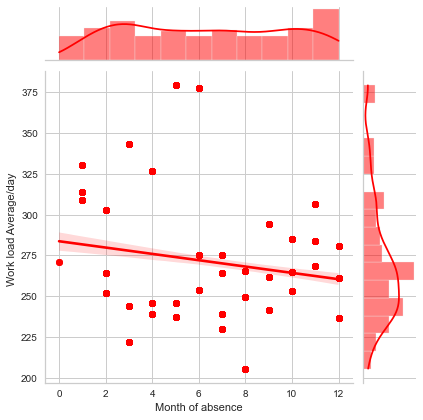

Correlation between Month of absence and Hit target ==>  -0.4604529230796341


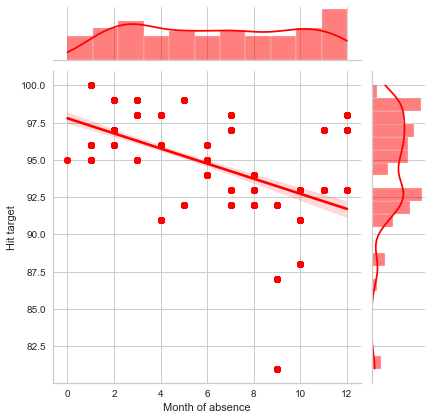

Correlation between Month of absence and Disciplinary failure ==>  0.10794590464264107


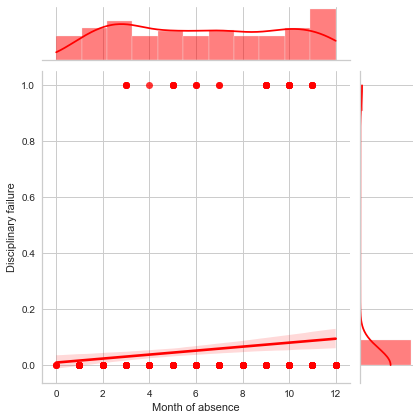

Correlation between Month of absence and Education ==>  -0.06612773288595455


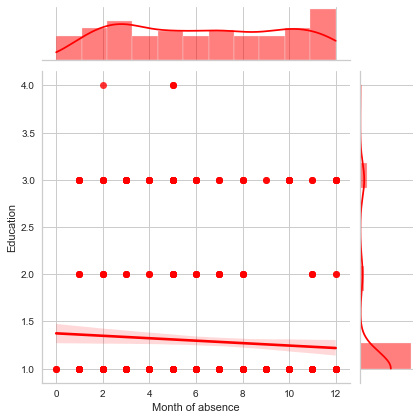

Correlation between Month of absence and Son ==>  0.0790313060905905


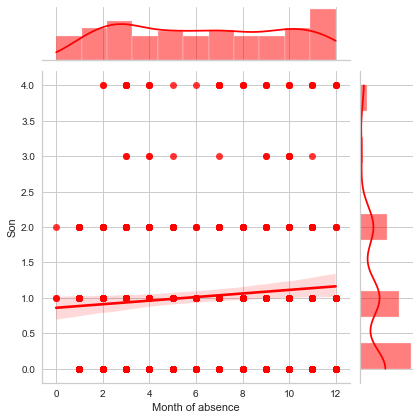

Correlation between Month of absence and Social drinker ==>  0.05622615171978809


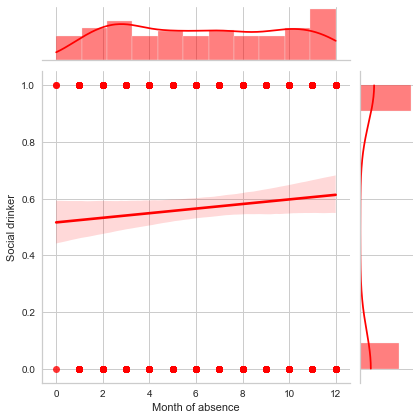

Correlation between Month of absence and Social smoker ==>  -0.03860251075363551


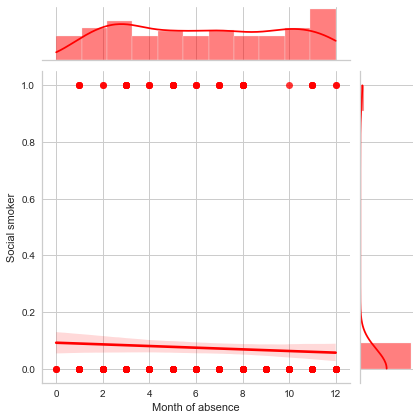

Correlation between Month of absence and Pet ==>  0.047787272714889785


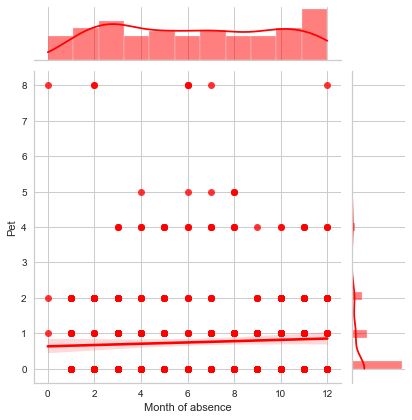

Correlation between Month of absence and Weight ==>  0.023278258077894763


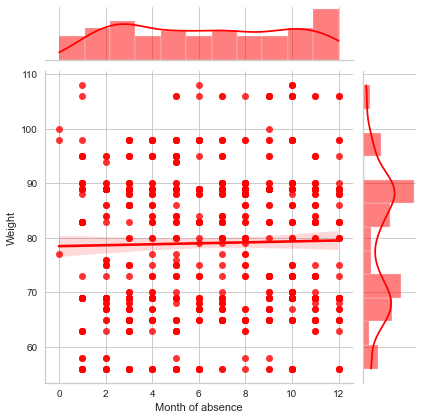

Correlation between Month of absence and Height ==>  -0.06894242188564852


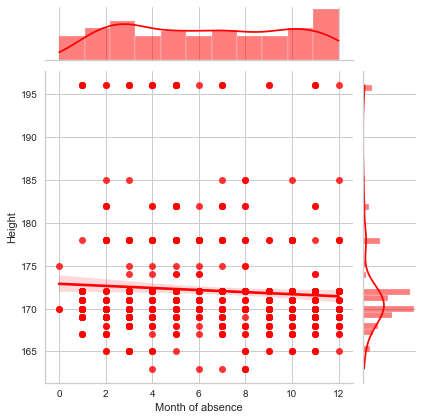

Correlation between Month of absence and Body mass index ==>  0.05104628155018345


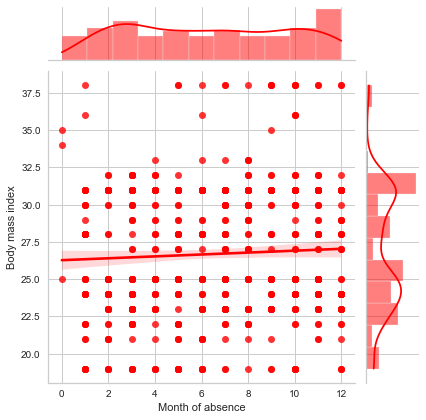

Correlation between Month of absence and Absenteeism time in hours ==>  0.024345356944867703


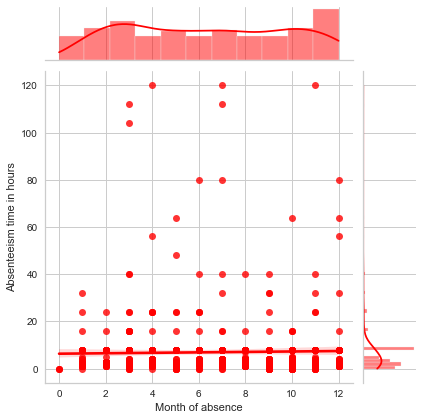

In [47]:
plt.figure(dpi = 100, figsize = (5,4))
print("Joint plot of Month of Absence with Other Variables")

for i in  data.columns:
    if i != 'Glucose' and i != 'Outcome':
        print(f"Correlation between Month of absence and {i} ==> ", data.corr().loc['Month of absence'][i])
        sns.jointplot(x = 'Month of absence', y = i, data = data, kind = 'reg', color = 'red')
        plt.show()

array([[<AxesSubplot:title={'center':'ID'}>,
        <AxesSubplot:title={'center':'Reason for absence'}>,
        <AxesSubplot:title={'center':'Month of absence'}>,
        <AxesSubplot:title={'center':'Day of the week'}>,
        <AxesSubplot:title={'center':'Seasons'}>],
       [<AxesSubplot:title={'center':'Transportation expense'}>,
        <AxesSubplot:title={'center':'Distance from Residence to Work'}>,
        <AxesSubplot:title={'center':'Service time'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Work load Average/day '}>],
       [<AxesSubplot:title={'center':'Hit target'}>,
        <AxesSubplot:title={'center':'Disciplinary failure'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'Son'}>,
        <AxesSubplot:title={'center':'Social drinker'}>],
       [<AxesSubplot:title={'center':'Social smoker'}>,
        <AxesSubplot:title={'center':'Pet'}>,
        <AxesSubplot:title={'center':'Weight'}

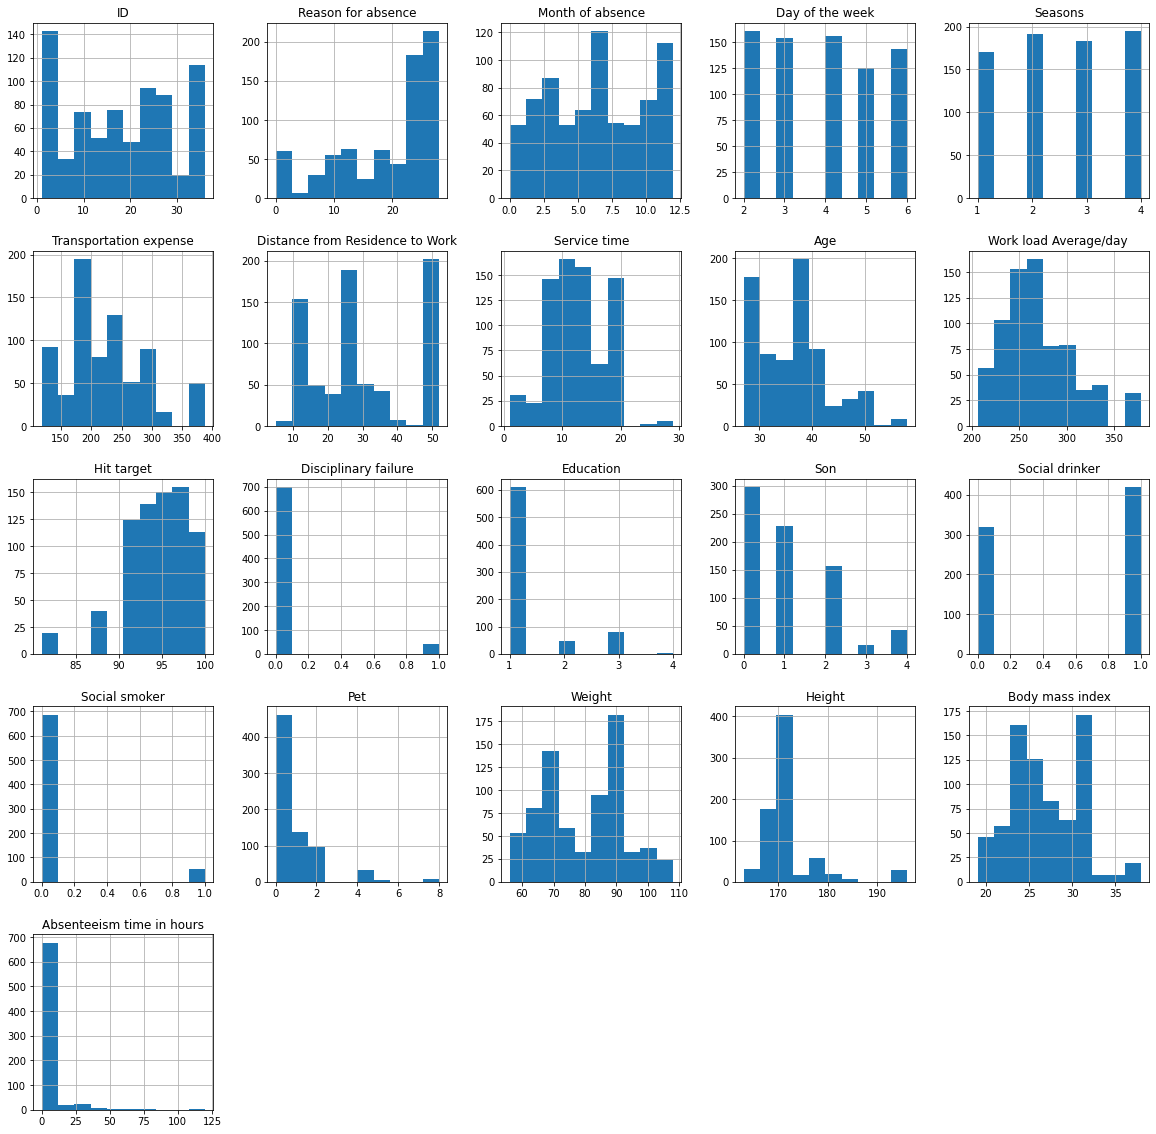

In [11]:
# 데이터 분포 관찰 위해 시각화
data.hist(figsize = (20,20))

In [12]:
data['Social drinker'].value_counts()

1    420
0    320
Name: Social drinker, dtype: int64

In [13]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

# tolist : array를 list로 변환
vals = data['Social drinker'].value_counts().tolist()
labels = [0,1]

df = [go.Bar(x = labels, y = vals, marker = dict(color="#F7CF6A"))]

layout = go.Layout(title = "Count by Social drinker")

fig = go.Figure(data = df, layout = layout)

iplot(fig, filename = 'basic-bar')

In [14]:
# 함수 정의
def customized_scatterplot(y, x):
        ## plot sizing
    style.use('fivethirtyeight')
    plt.subplots(figsize = (12,8))
    # 타겟 변수 plotting - 예측 변수
    sns.scatterplot(y = y, x = x);

In [15]:
data.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

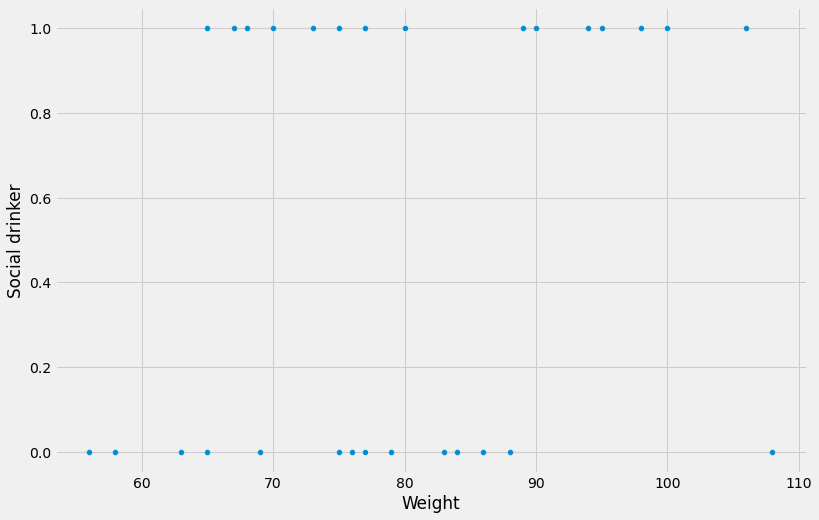

In [16]:
customized_scatterplot(data['Social drinker'], data['Weight'])

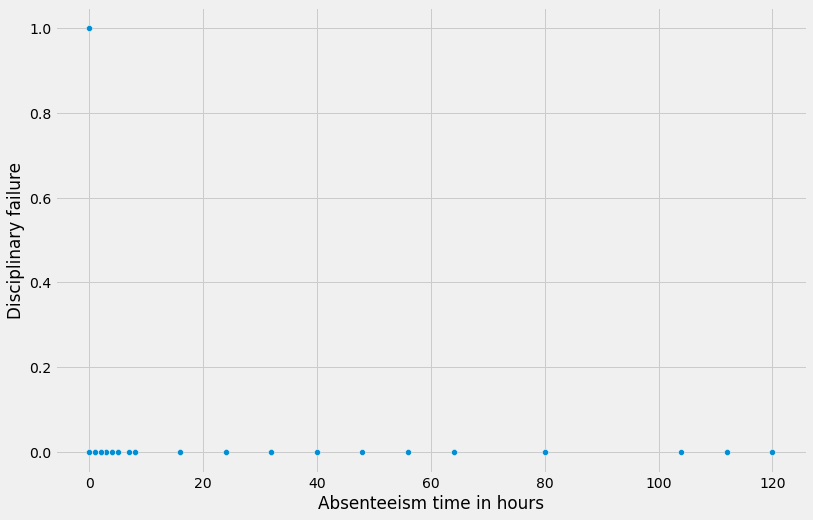

In [17]:
customized_scatterplot(data['Disciplinary failure'], data['Absenteeism time in hours'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'ID'),
  Text(1, 0, 'Reason for absence'),
  Text(2, 0, 'Month of absence'),
  Text(3, 0, 'Day of the week'),
  Text(4, 0, 'Seasons'),
  Text(5, 0, 'Transportation expense'),
  Text(6, 0, 'Distance from Residence to Work'),
  Text(7, 0, 'Service time'),
  Text(8, 0, 'Age'),
  Text(9, 0, 'Work load Average/day '),
  Text(10, 0, 'Hit target'),
  Text(11, 0, 'Disciplinary failure'),
  Text(12, 0, 'Education'),
  Text(13, 0, 'Son'),
  Text(14, 0, 'Social drinker'),
  Text(15, 0, 'Social smoker'),
  Text(16, 0, 'Pet'),
  Text(17, 0, 'Weight'),
  Text(18, 0, 'Height'),
  Text(19, 0, 'Body mass index'),
  Text(20, 0, 'Absenteeism time in hours')])

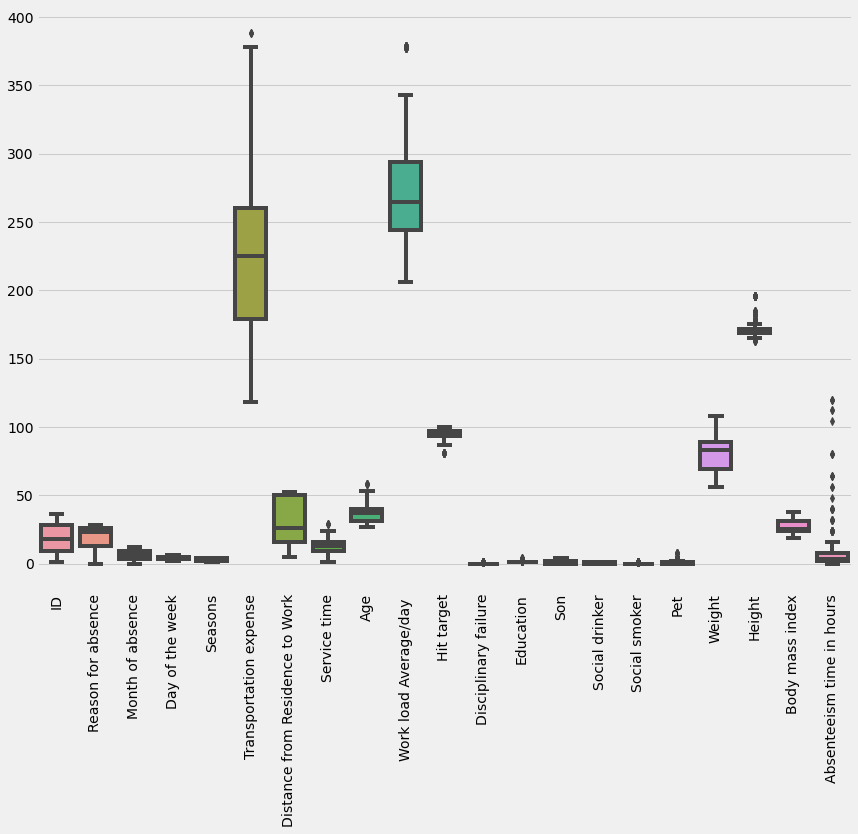

In [18]:
# outlier 확인
plt.figure(figsize = (13,10))
sns.boxplot(data = data)
plt.xticks(rotation = 90)

<AxesSubplot:>

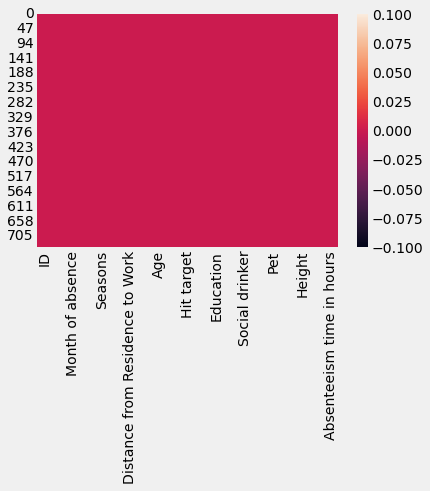

In [19]:
# missing 값이나 null 값 찾아보기
sns.heatmap(data.isnull())

In [20]:
# Drop outliers -> according to z-score
from scipy import stats
z = np.abs(stats.zscore(data))
print(z)

threshold = 3
print(np.where(z > 3))

data_o = data[(z < 3).all(axis=1)]

           ID  Reason for absence  Month of absence  Day of the week  \
0    0.637161            0.804938          0.196763         0.643947   
1    1.632719            2.280124          0.196763         0.643947   
2    1.363523            0.448970          0.196763         0.059924   
3    1.000342            1.449530          0.196763         0.763796   
4    0.637161            0.448970          0.196763         0.763796   
..        ...                 ...               ...              ...   
735  0.637161            0.618937          0.196763         0.643947   
736  1.545113            0.974905          0.196763         0.643947   
737  1.272728            2.280124          1.841698         0.643947   
738  0.909547            2.280124          1.841698         0.059924   
739  1.541923            2.280124          1.841698         1.467667   

      Seasons  Transportation expense  Distance from Residence to Work  \
0    1.390175                1.011408                        

In [21]:
data.shape

(740, 21)

In [22]:
data_o.shape
# 740 -> 576 줄어들었다!

(576, 21)

In [23]:
# Normalize
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, normalize

# 컬럼명
names = data_o.columns

# Create Scaler object
scaler = preprocessing.StandardScaler()

# Fit data on the scaler object
scaled_df = scaler.fit_transform(data_o)
scaled_df = pd.DataFrame(scaled_df, columns=names)
  
# Normalizing the Data 
normalized_df = normalize(scaled_df) 
  
# Converting the numpy array -> pandas DataFrame 
normalized_df = pd.DataFrame(normalized_df,columns=names) 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'ID'),
  Text(1, 0, 'Reason for absence'),
  Text(2, 0, 'Month of absence'),
  Text(3, 0, 'Day of the week'),
  Text(4, 0, 'Seasons'),
  Text(5, 0, 'Transportation expense'),
  Text(6, 0, 'Distance from Residence to Work'),
  Text(7, 0, 'Service time'),
  Text(8, 0, 'Age'),
  Text(9, 0, 'Work load Average/day '),
  Text(10, 0, 'Hit target'),
  Text(11, 0, 'Disciplinary failure'),
  Text(12, 0, 'Education'),
  Text(13, 0, 'Son'),
  Text(14, 0, 'Social drinker'),
  Text(15, 0, 'Social smoker'),
  Text(16, 0, 'Pet'),
  Text(17, 0, 'Weight'),
  Text(18, 0, 'Height'),
  Text(19, 0, 'Body mass index'),
  Text(20, 0, 'Absenteeism time in hours')])

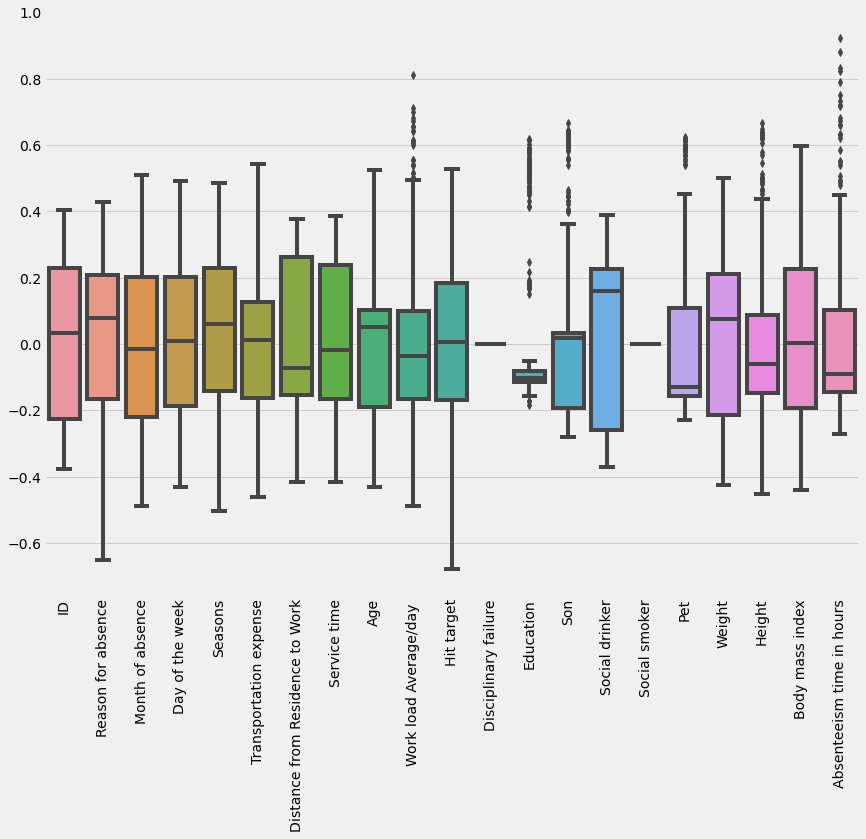

In [24]:
plt.figure(figsize = (13,10))
sns.boxplot(data = normalized_df)
plt.xticks(rotation = 90)

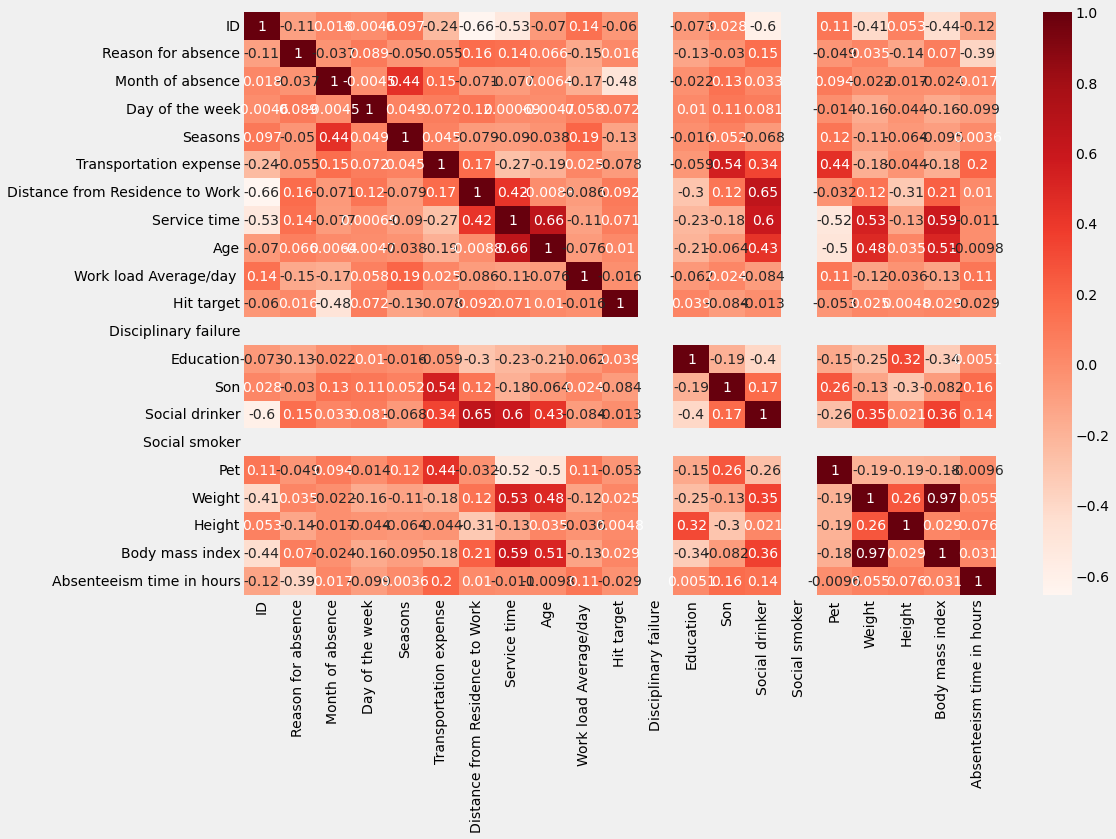

In [25]:
# Pearson Correlation
plt.figure(figsize = (15,10))
cor = normalized_df.corr()
sns.heatmap(cor, annot = True, cmap = plt.cm.Reds)
plt.show()

In [26]:
# Correlation with output variable
cor_target = abs(cor["Absenteeism time in hours"])

# Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

Absenteeism time in hours    1.0
Name: Absenteeism time in hours, dtype: float64

# Modeling

### LassoCV 라소 회귀분석

In [27]:
# Feature Selection using LassoCV
# 라소 회귀분석

from sklearn.linear_model import LassoCV

# Feature Selection
X = normalized_df.drop("Absenteeism time in hours",axis=1)   # Feature Matrix
y = normalized_df["Absenteeism time in hours"]          # Target Variable

reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 0.000978
Best score using built-in LassoCV: 0.231187


In [28]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables.")

Lasso picked 12 variables and eliminated the other 8 variables.


Text(0.5, 1.0, 'Feature importance _ Lasso model')

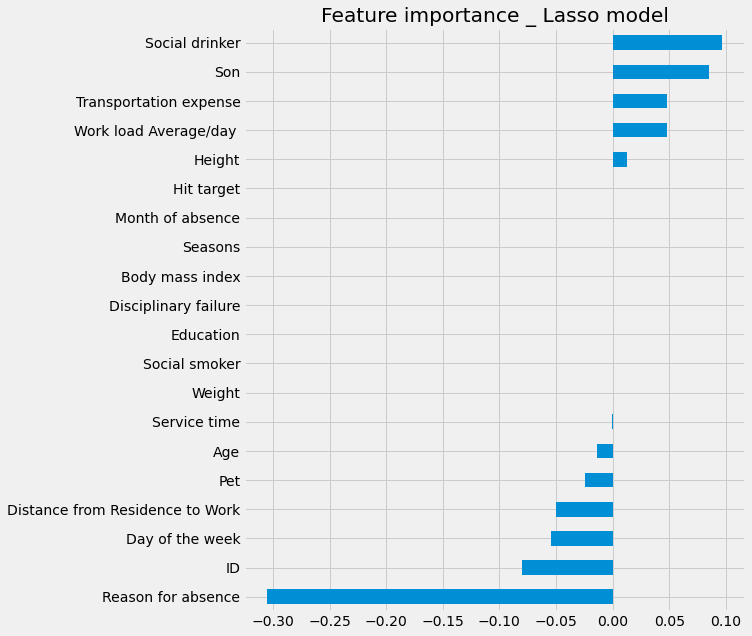

In [29]:
imp_coef = coef.sort_values()

import matplotlib

matplotlib.rcParams['figure.figsize'] = (8, 10)
imp_coef.plot(kind = "barh")

plt.title("Feature importance _ Lasso model")

In [30]:
X=X.drop(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Distance from Residence to Work',
       'Service time', 'Age',  'Hit target',
       'Disciplinary failure', 'Education', 
       'Social smoker', 'Pet', 'Weight', 'Body mass index'], axis = 1)

### K-Means Clustering

In [31]:
# K-Means Clustering
from sklearn.cluster import KMeans

# WCSS Elbow point 정의
wcss=[]
for i in range (1,30):
    kmeans=KMeans(i)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
wcss

C:\Users\jwoo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\jwoo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

C:\Users\jwoo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\jwoo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

C:\Users\jwoo\an

C:\Users\jwoo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\jwoo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

C:\Users\jwoo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\jwoo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

C:\Users\jwoo\an

[151.1002581395619,
 111.28238498435539,
 85.80222134729138,
 70.3931951415479,
 59.575885204880294,
 49.506363108571236,
 42.160118698529956,
 36.868168625901674,
 31.296153644041,
 28.46896982103084,
 25.522691451018495,
 23.706433416156944,
 21.781481256405698,
 20.33278036164231,
 18.928959975773026,
 17.265651822688902,
 16.600963066214653,
 15.744918491452804,
 14.806116954179698,
 13.858211988058803,
 12.882711350104229,
 12.107336443956886,
 11.625266865332245,
 10.961605995723986,
 10.431653712715217,
 9.736850477119596,
 9.195028149540597,
 8.577292123480083,
 8.27523642832846]

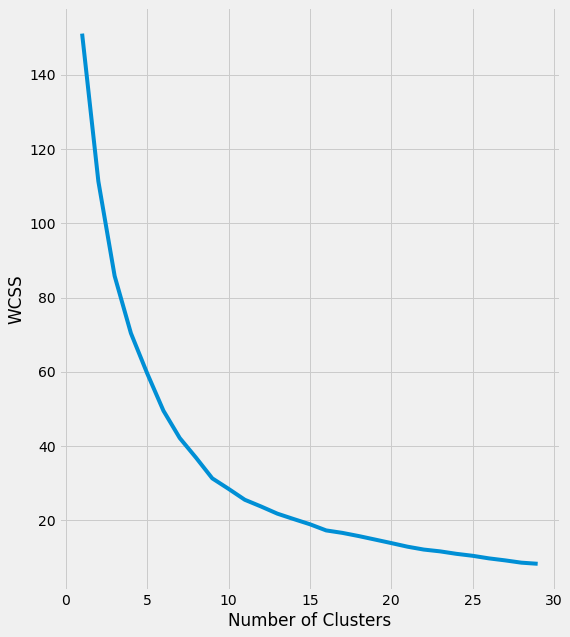

In [32]:
# Elbow Plot
plt.plot(range(1,30), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [33]:
!pip install -U scikit-learn

C:\Users\jwoo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\jwoo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

C:\Users\jwoo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\jwoo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

C:\Users\jwoo\an

C:\Users\jwoo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\jwoo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

C:\Users\jwoo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\jwoo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

C:\Users\jwoo\an

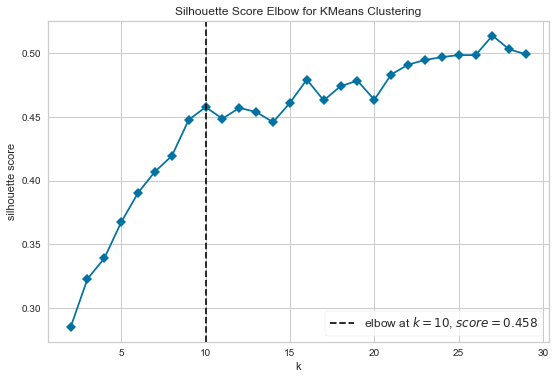

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [34]:
# Another Technique ~ n_cluster 정의

# KElbowVisualizer method import
from yellowbrick.cluster import KElbowVisualizer

# scikit-learn K-Means model 인스턴스화
model = KMeans(random_state=42)

# KElbowVisualizer 인스턴스화 <- clusters 수, metric 
visualizer = KElbowVisualizer(model, k=(2,30), metric='silhouette', timings=False)

# Fit the data and visualize
visualizer.fit(X)    
visualizer.poof()  

In [35]:
k_means_new = KMeans(10)
kmeans.fit(X)
cluster_new = X.copy()
cluster_new['cluster_pred'] = k_means_new.fit_predict(X)
cluster_new.head()

C:\Users\jwoo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\jwoo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.

C:\Users\jwoo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\Users\jwoo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



Transportation expense  Work load Average/day        Son  Social drinker  \
0                0.328957               -0.254351  0.324561        0.294374   
1               -0.177749               -0.214543 -0.217476        0.248302   
2                0.329408               -0.254699  0.325005        0.294778   
3               -0.165427               -0.199670 -0.202400        0.231089   
4                0.377743               -0.140836  0.018475        0.162997   

     Height  cluster_pred  
0  0.120332             8  
1 -0.069948             6  
2  0.120497             8  
3 -0.065099             6  
4  0.066629             8

In [36]:
# Visualize cluster shapes (3d)

cluster1=cluster_new.loc[cluster_new['cluster_pred'] == 0]
cluster2=cluster_new.loc[cluster_new['cluster_pred'] == 1]
cluster1=cluster_new.loc[cluster_new['cluster_pred'] == 2]
cluster2=cluster_new.loc[cluster_new['cluster_pred'] == 3]
cluster1=cluster_new.loc[cluster_new['cluster_pred'] == 4]
cluster2=cluster_new.loc[cluster_new['cluster_pred'] == 5]
cluster1=cluster_new.loc[cluster_new['cluster_pred'] == 6]
cluster2=cluster_new.loc[cluster_new['cluster_pred'] == 7]
cluster1=cluster_new.loc[cluster_new['cluster_pred'] == 8]
cluster2=cluster_new.loc[cluster_new['cluster_pred'] == 9]

C:\Users\jwoo\anaconda3\lib\site-packages\seaborn\regression.py:592: UserWarning:

legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.



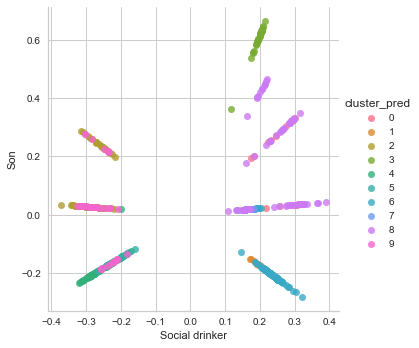

In [37]:
import seaborn as sns

# plot data with seaborn
facet = sns.lmplot(data = cluster_new, x = 'Social drinker', y = 'Son', 
                   hue = 'cluster_pred', fit_reg = False, legend = True, legend_out = True)

### Hierachical Clustering

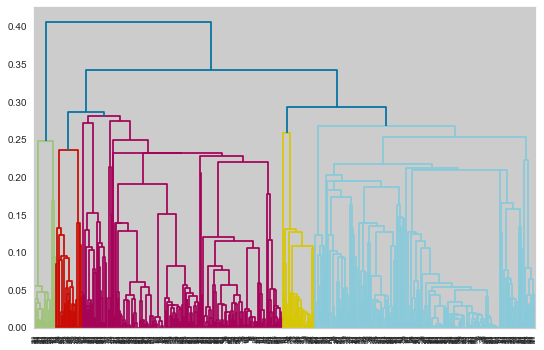

In [38]:
import scipy.cluster.hierarchy as hcluster
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

# single linkage
mergings = linkage(X, method = "single", metric = 'euclidean')
dendrogram(mergings) # 덴드로그램
plt.show()

In [39]:
features = normalized_df.columns

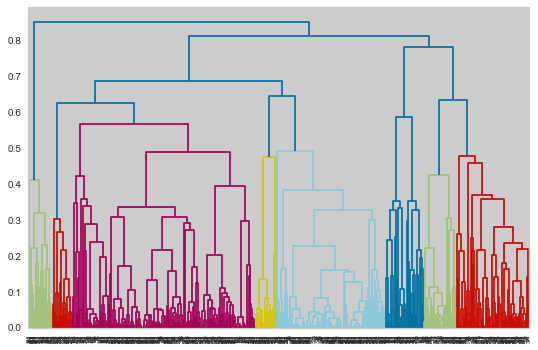

In [40]:
# average linkage
mergings = linkage(X, method = "average", metric = 'euclidean')
dendrogram(mergings)
plt.show()

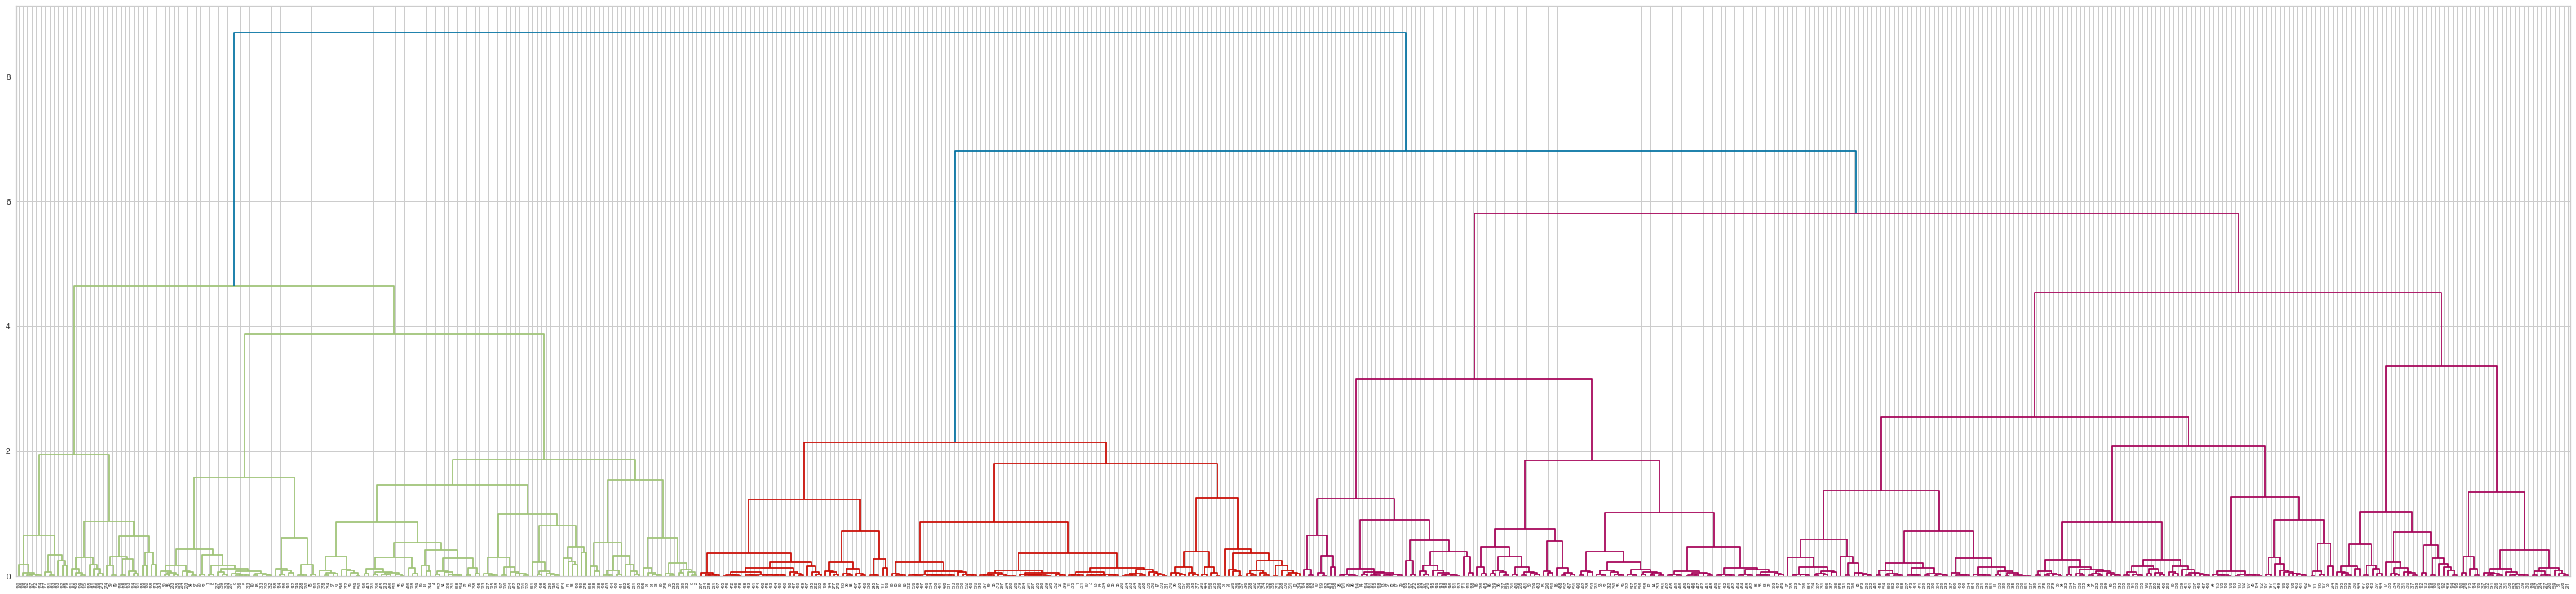

In [41]:
# dendogram plot
plt.figure(figsize=(50, 12))
dend = hcluster.dendrogram(hcluster.linkage(X, method = 'ward'))

In [42]:
# Agglomearative Hierarchical clustering -> label
hcluster = AgglomerativeClustering(n_clusters = 10, affinity = 'euclidean', linkage = 'ward')  
hcluster.fit_predict(X)
hcluster_label = hcluster.labels_

C:\Users\jwoo\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead



In [43]:
hcluster_df = pd.DataFrame(X)

# adding hcluster labels in hcluster_df
hcluster_df['hcluster'] = hcluster_label

hcluster_df.head()

Transportation expense  Work load Average/day        Son  Social drinker  \
0                0.328957               -0.254351  0.324561        0.294374   
1               -0.177749               -0.214543 -0.217476        0.248302   
2                0.329408               -0.254699  0.325005        0.294778   
3               -0.165427               -0.199670 -0.202400        0.231089   
4                0.377743               -0.140836  0.018475        0.162997   

     Height  hcluster  
0  0.120332         3  
1 -0.069948         0  
2  0.120497         3  
3 -0.065099         0  
4  0.066629         3

C:\Users\jwoo\anaconda3\lib\site-packages\seaborn\regression.py:592: UserWarning:

legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.



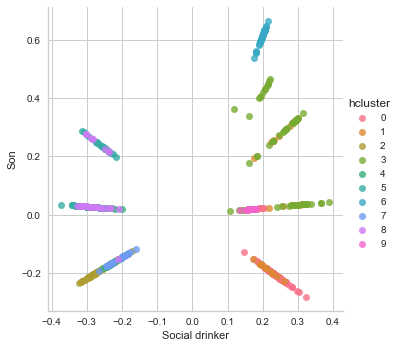

In [44]:
facet = sns.lmplot(data=hcluster_df, x = 'Social drinker', y = 'Son', 
                   hue = 'hcluster', fit_reg = False, legend = True, legend_out = True)

### Affinity Propagation Clustering

In [3]:
import pandas as pd
from sklearn.cluster import AffinityPropagation
from sklearn.preprocessing import StandardScaler

data = pd.read_csv("Absenteeism_at_work.csv", sep=";")

# Separate the target variable (absenteeism time in hours)
target = data["Absenteeism time in hours"]
data.drop("Absenteeism time in hours", axis = 1, inplace = True)

# Scale the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Affinity Propagation 클러스터링
aff_prop = AffinityPropagation(damping = 0.5, preference = -50)
aff_prop.fit(data_scaled)

# Get the cluster labels
cluster_labels = aff_prop.labels_

# Print the cluster labels for each data point
print("Cluster labels : \n", cluster_labels)

Cluster labels : 
 [18  4  2 17 18 39 51  0 15 30  0  0  0  2  2 24 39  2 40 41 29  2 51 27
 18 51 18 16 18  2  2  1 30  1  2 51 18 31  1 27 26 50  2 28 15 50  2 31
 27 34 37 37 36  3 37  4 36  6 37  5  6 27  6  3  4 47  6 26  3 36  5 34
  6 36 27 34 36 34 35 27  6 36  6 25 34 11 36 34 36 11 36 25 36 27  5 36
 34 34  5  3 46 22 36 27  3 35 36 27 36 35  3 24 26  9  7  7 11  9  9  9
  9  7  9  7  7  7  7  7  7  8 38  7  9  7  7  9 38  9 12 10 11  9 27 38
 12 12  9  9  8  9  9 29 29  9  9 12  0 16 25 12  0  8 41 27 25 15  0 11
 38 25 27  9 17 10  9  9  8  9  9 10 17  9 41  9 34  9 11 12 11  9 27 10
 46 12 12 34 41 27 38 11 13 38 22 14 38 11 11 10  9  9 11 10 38 37 48 23
 48 10 46 51 12 35 12 12 12 10 11 12 46 22 46 46 13 10 32  9 15 46 50 50
 29 47 15 29 29 16 51 18 39 18 18  0 18 16 18 42 17 17 27 18 41 29 47 46
 41 30 46 30 51 40 19 19 31 20 19 31 20 37 19 31 19 31 31 28 46 20 34 34
 19 34 22 34 34  4 20 21  3 33  6 21 20 34 27 20 28 28 46 34 21 46 35 37
 37 37 21 21 46  3  5  6 27 34 1

C:\Users\jwoo\AppData\Local\Temp/ipykernel_14896/1768603040.py:6: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


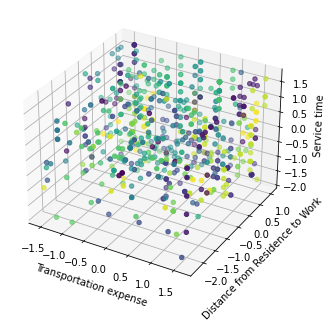

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Plot the clusters
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data_scaled[:, 0], data_scaled[:, 1], data_scaled[:, 2], c=cluster_labels)
ax.set_xlabel('Transportation expense')
ax.set_ylabel('Distance from Residence to Work')
ax.set_zlabel('Service time')
plt.show()


### Silhouette analysis

In [45]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8,9,10,11]

for num_clusters in range_n_clusters:
    hcluster = AgglomerativeClustering(n_clusters = num_clusters, affinity = 'euclidean', linkage = 'ward')  
    hcluster.fit_predict(X)
    hcluster_label = hcluster.labels_
    
    # silhouette 점수
    silhouette_avg = silhouette_score(X, hcluster_label)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.543143159868007
For n_clusters=3, the silhouette score is 0.5773067650765904
For n_clusters=4, the silhouette score is 0.5946954848661825
For n_clusters=5, the silhouette score is 0.6088500727548206
For n_clusters=6, the silhouette score is 0.6391201129904711
For n_clusters=7, the silhouette score is 0.6668206206856714
For n_clusters=8, the silhouette score is 0.6804154084759017
For n_clusters=9, the silhouette score is 0.7419259494483151
For n_clusters=10, the silhouette score is 0.7735890174965222
For n_clusters=11, the silhouette score is 0.6692885653950439


C:\Users\jwoo\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead

C:\Users\jwoo\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead

C:\Users\jwoo\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead

C:\Users\jwoo\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead

C:\Users\jwoo\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead

C:\Users\j